# Essential Imports

In [28]:
!pip install gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load data

In [29]:
!gdown --id 16uFzwzOA31PoWhTSNNe6XdQzprhPIk4h

file_path = "/kaggle/working/4K_House_Rent_Dataset.csv"
df = pd.read_csv(file_path)
df.head()

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=16uFzwzOA31PoWhTSNNe6XdQzprhPIk4h
To: /kaggle/working/4K_House_Rent_Dataset.csv
100%|████████████████████████████████████████| 567k/567k [00:00<00:00, 73.8MB/s]


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


# Dataset Summary

In [30]:
df.describe().round(3)

,BHK,Rent,Size,Bathroom
count,4746.000,4746.000,4746.000,4746.000
mean,2.084,34993.451,967.491,1.966
std,0.832,78106.413,634.202,0.885
min,1.000,1200.000,10.000,1.000
25%,2.000,10000.000,550.000,1.000
50%,2.000,16000.000,850.000,2.000
75%,3.000,33000.000,1200.000,2.000
max,6.000,3500000.000,8000.000,10.000


# Preparing Data

In [31]:
X = df['Size'].values
y = df['Rent'].values
X = (X - np.mean(X)) / np.std(X)
X = np.column_stack((np.ones(len(X)), X))

# Gradient Descent

In [32]:
theta = np.zeros(2)
alpha = 0.01
iterations = 1000

In [33]:
def compute_cost(X, y, theta):
    predictions = np.dot(X, theta)
    errors = predictions - y
    cost = np.sum(errors ** 2) / (2 * len(y))
    return cost


def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = []
    for _ in range(iterations):
        predictions = np.dot(X, theta)
        errors = predictions - y
        gradient = np.dot(X.T, errors) / len(y)
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    return theta, cost_history

In [34]:
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)

# Result

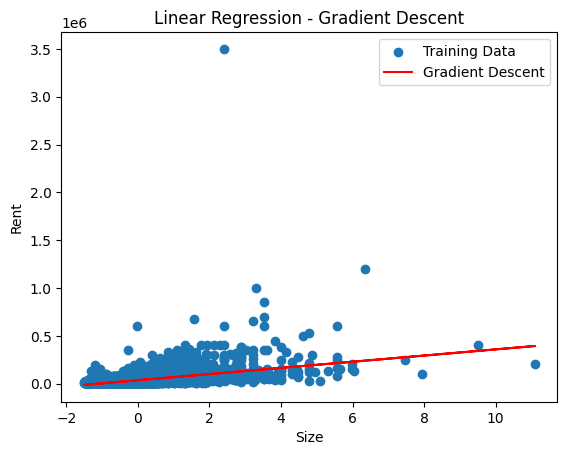

In [38]:
plt.scatter(X[:, 1], y, label='Training Data')
plt.plot(X[:, 1], np.dot(X, theta), color='red', label='Gradient Descent')
plt.xlabel('Size')
plt.ylabel('Rent')
plt.title('Linear Regression - Gradient Descent')
plt.legend()
plt.show()

### Plot the cost over iterations

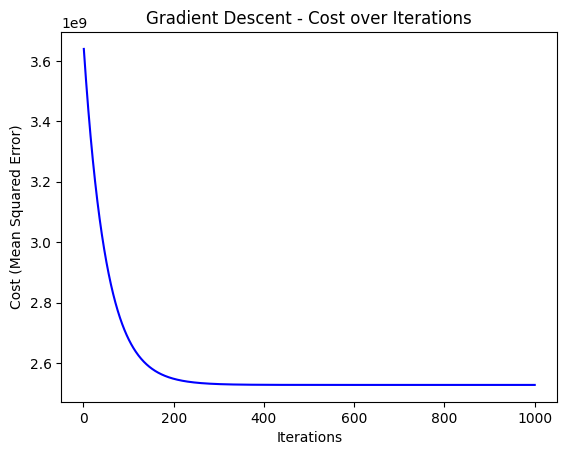

In [39]:
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost (Mean Squared Error)')
plt.title('Gradient Descent - Cost over Iterations')
plt.show()